In [1]:
from fisher import Fisher
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
N0_file = "cache/_N0/N0_my_Planck_14_14_TQU.npy"
ells_sample_file = "cache/_M/4000_1000/ells.npy"
M_file = "cache/_M/4000_1000/M.npy"

In [3]:
fisher = Fisher(N0_file, ells_sample_file, M_file)

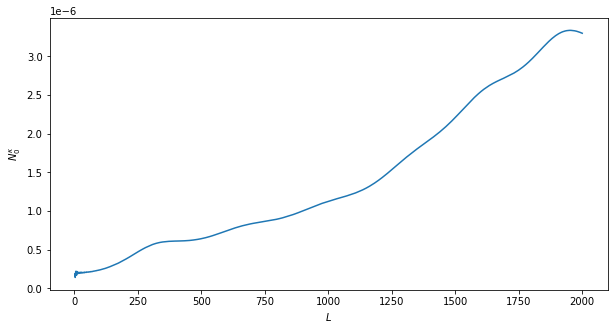

In [4]:
ellmax = 2000
N0_kappa = fisher.noise.get_N0("kappa", ellmax, tidy=True)
ells = np.arange(ellmax + 1)
plt.plot(ells[2:], N0_kappa[2:])
plt.xlabel("$L$")
plt.ylabel("$N_0^{\kappa}$")
plt.show()

In [13]:
Lmaxs = [2000, 4000, 4000, 4000, 4000, 4000]
dL = 1
Ntheta = 10
f_skys = [0.7, 0.65, 0.06, 0.4, 0.5, 0.4]
exps = ["my_Planck", "my_SA", "my_SPT", "my_S4", "my_S5", "my_SO"]

In [5]:
t0 = time.time()
for iii, exp in enumerate(exps):
    N0_file = f"cache/_N0/N0_{exp}_14_14_TQU.npy"
    fisher = Fisher(N0_file, ells_sample_file, M_file)
    f_sky = f_skys[iii]
    F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmaxs[iii], dL, Ntheta=Ntheta, f_sky=f_sky)
    print(exp)
    print(f"S/N = {np.sqrt(F_conv_rot)}")
    print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")


my_Planck
S/N = 0.06722782420707157
---------------------------
my_SA
S/N = 0.4226410067147236
---------------------------
my_SPT
S/N = 0.4928470602640161
---------------------------
my_S4
S/N = 3.250659254517087
---------------------------
my_S5
S/N = 7.245448316007239
---------------------------
my_SO
S/N = 1.506048321995421
---------------------------
Time = 510.0412402153015


In [6]:
dL = 10
t0 = time.time()
for iii, exp in enumerate(exps):
    N0_file = f"cache/_N0/N0_{exp}_14_14_TQU.npy"
    fisher = Fisher(N0_file, ells_sample_file, M_file)
    f_sky = f_skys[iii]
    Ls, F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmaxs[iii], dL, Ntheta=Ntheta, f_sky=f_sky, arr=True)
    print(exp)
    print(f"S/N = {np.sqrt(np.sum(F_conv_rot))}")
    print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

my_Planck
S/N = 0.06723918722867435
---------------------------
my_SA
S/N = 0.42229692675358627
---------------------------
my_SPT
S/N = 0.4924423222027177
---------------------------
my_S4
S/N = 3.248085206301389
---------------------------
my_S5
S/N = 7.240268970989065
---------------------------
my_SO
S/N = 1.5047871440560772
---------------------------
Time = 60.55717897415161


111.42835998535156


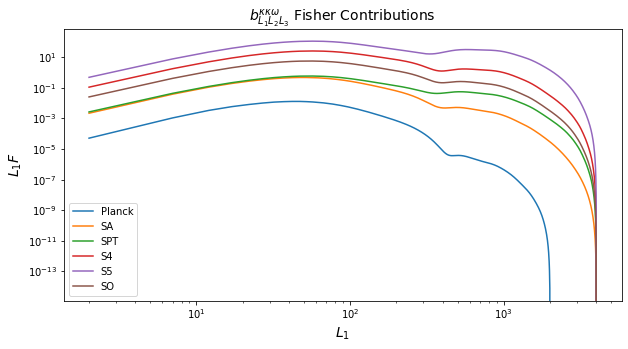

In [7]:
dL = 5
t0 = time.time()
for iii, exp in enumerate(exps):
    N0_file = f"cache/_N0/N0_{exp}_14_14_TQU.npy"
    fisher = Fisher(N0_file, ells_sample_file, M_file)
    Ls_rot, F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmaxs[iii], dL, Ntheta=Ntheta, f_sky=f_skys[iii], arr=True)
    plt.loglog(Ls_rot, Ls_rot*F_conv_rot, label=f"{exp[3:]}")
t1 = time.time()
print(t1-t0)
plt.title("$b_{L_1L_2L_3}^{\kappa\kappa\omega}$ Fisher Contributions", fontsize=14)
plt.xlabel("$L_1$", fontsize=14)
plt.ylabel("$L_1F$", fontsize=14)
plt.legend()
plt.show()

111.09820413589478


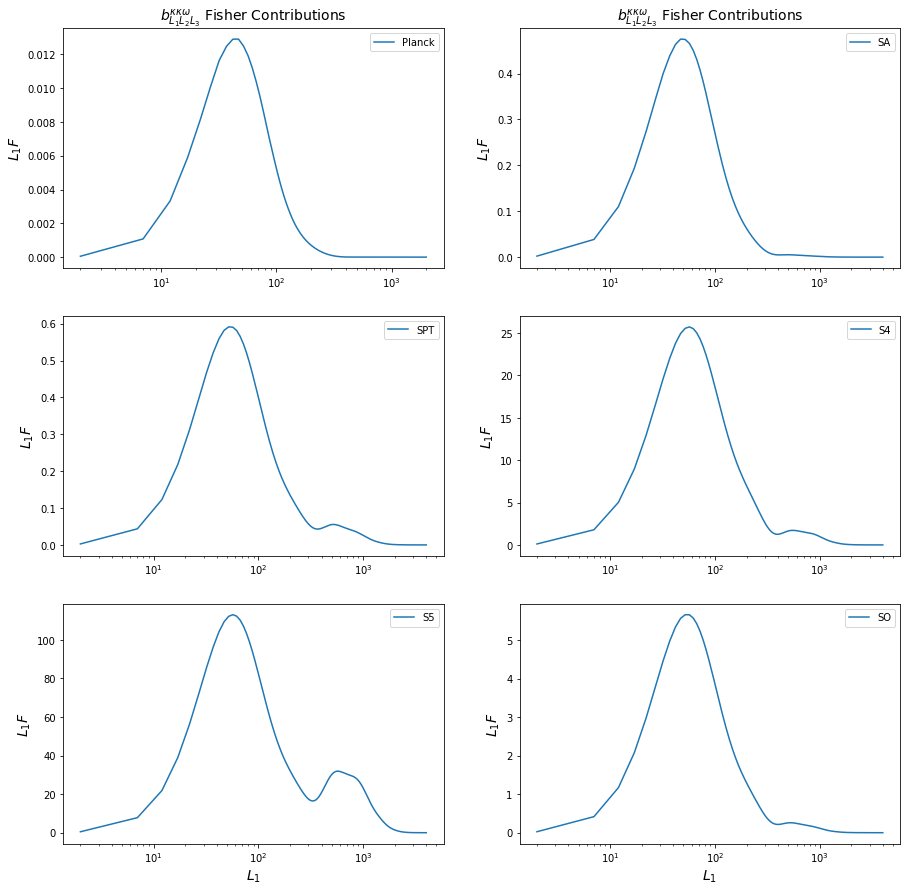

In [8]:
dL = 5
t0 = time.time()
fig, ax = plt.subplots(3,2, figsize=[15, 15])
for iii, exp in enumerate(exps):
    N0_file = f"cache/_N0/N0_{exp}_14_14_TQU.npy"
    fisher = Fisher(N0_file, ells_sample_file, M_file)
    Ls_rot, F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmaxs[iii], dL, Ntheta=Ntheta, f_sky=f_skys[iii], arr=True)
    row = iii//2
    if iii % 2: col = 1
    else: col = 0
    ax[row][col].semilogx(Ls_rot, Ls_rot*F_conv_rot, label=f"{exp[3:]}")
    ax[row][col].set_ylabel("$L_1F$", fontsize=14)
    ax[row][col].legend()
    if row == 0:
        ax[row][col].set_title("$b_{L_1L_2L_3}^{\kappa\kappa\omega}$ Fisher Contributions", fontsize=14)
    elif row == 2:
        ax[row][col].set_xlabel("$L_1$", fontsize=14)
t1 = time.time()
print(t1-t0)
plt.show()

In [9]:
def get_Ls(ellmax, Nells):    
    part1 = 200
    part2 = 1500
    if ellmax <= part1:
        return np.linspace(2, part1, Nells)
    if ellmax <= part2:
        ells_part1 = np.linspace(2, part1, Nells // 2)
        Nells_remaining = Nells - np.size(ells_part1)
        ells_remaining = np.linspace(part1 + 1, ellmax, Nells_remaining)
        return np.concatenate((ells_part1, ells_remaining))
    ells_part1 = np.linspace(2, part1, Nells//3)
    ells_part2 = np.linspace(part1 + 1, part2, Nells//3)
    Nells_remaining = Nells - np.size(ells_part1) - np.size(ells_part2)
    ells_remaining = np.linspace(part2 + 1, ellmax, Nells_remaining)
    return np.concatenate((ells_part1, ells_part2, ells_remaining)).astype("double")

In [10]:
N0_file = "cache/_N0/N0_my_S5_14_14_TQU.npy"
fisher = Fisher(N0_file, ells_sample_file, M_file)
Lmax = 4000
Nells = np.array([10, 100, 200, 500, 1000])
Ntheta = 10
f_sky = 0.5
for Nell in Nells: 
    L1s = get_Ls(Lmax, Nell)
    t0 = time.time()
    F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Ls=L1s, Ntheta=Ntheta, f_sky=f_sky)
    t1 = time.time()
    print("----------------------")
    print(f"Nell = {Nell}")
    print(f"Time = {t1 - t0}")
    print(f"F = {F_conv_rot}")
    print(f"S/N = {np.sqrt(F_conv_rot)}")

----------------------
Nell = 10
Time = 3.770264148712158
F = 17.293264422815092
S/N = 4.158517094207392
----------------------
Nell = 100
Time = 3.800794839859009
F = 51.08352196514416
S/N = 7.147273743543349
----------------------
Nell = 200
Time = 4.161974906921387
F = 51.85446792854583
S/N = 7.201004647168743
----------------------
Nell = 500
Time = 6.911975860595703
F = 52.291617498508394
S/N = 7.231294316960719
----------------------
Nell = 1000
Time = 16.721825122833252
F = 52.432783892698495
S/N = 7.241048535446955


In [11]:
Lmaxs = [2000, 4000, 4000, 4000, 4000, 4000]
Nell = 500
t0 = time.time()
for iii, exp in enumerate(exps):
    N0_file = f"cache/_N0/N0_{exp}_14_14_TQU.npy"
    fisher = Fisher(N0_file, ells_sample_file, M_file)
    f_sky = f_skys[iii]
    Ls = get_Ls(Lmaxs[iii], Nell)
    F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Ls=Ls, Ntheta=Ntheta, f_sky=f_sky)    
    print(exp)
    print(f"S/N = {np.sqrt(F_conv_rot)}")
    print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

my_Planck
S/N = 0.06692947158231621
---------------------------
my_SA
S/N = 0.4209666156621792
---------------------------
my_SPT
S/N = 0.49141272285913384
---------------------------
my_S4
S/N = 3.242314436433852
---------------------------
my_S5
S/N = 7.231294316960719
---------------------------
my_SO
S/N = 1.5014345659883974
---------------------------
Time = 63.43717098236084


92.0
114.8
173.6
170.0
523.7818181818182
149.6
64.37770485877991


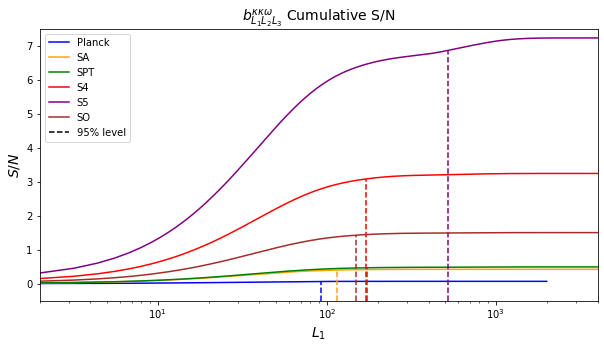

In [12]:
Nells = 500
level = 0.95
colors = ["blue", "orange", "green", "red", "purple", "brown"]
t0 = time.time()
for iii, exp in enumerate(exps):
    N0_file = f"cache/_N0/N0_{exp}_14_14_TQU.npy"
    fisher = Fisher(N0_file, ells_sample_file, M_file)
    Ls = get_Ls(Lmaxs[iii], Nells)
    F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Ls=Ls, Ntheta=Ntheta, f_sky=f_skys[iii], arr=True)
    SNs = np.sqrt(np.cumsum(F_conv_rot))
    plt.semilogx(Ls, SNs, label=f"{exp[3:]}", color=colors[iii])
    SN = SNs[-1]
    L_level = Ls[SNs < level*SN][-1]
    print(L_level)
    L_level_index = np.where(Ls==L_level)[0][0]
    L_levels = np.array([L_level, L_level])
    SN_levels = np.array([-0.5, SNs[L_level_index]])
    plt.plot(L_levels, SN_levels, color=colors[iii], linestyle="--")
t1 = time.time()
print(t1-t0)
plt.title("$b_{L_1L_2L_3}^{\kappa\kappa\omega}$ Cumulative S/N", fontsize=14)
plt.xlabel("$L_1$", fontsize=14)
plt.ylabel("$S/N$", fontsize=14)
plt.plot([1e10], [1e10], label="95% level", linestyle="--", color="k")
plt.ylim(-0.5, 7.5)
plt.xlim(2e0, 4e3)
plt.legend()
plt.show()